В этом блокноте мы научимся строить график японских свечей.

Для начала подключаем библиотеку pandas и загружаем интересующий нас файл при помощи метода `read_csv(file_name, delimeter, index_col, decimal, usecols, header, ...)`. Подробное описание можно найти по [ссылке](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

**Используйте файл с данными из своего варианта задания!!!**

Считаем файл в датафрейм

In [ ]:
link = 'https://studio.dc-edu.itmo.ru/assets/courseware/v1/824fccdb3e15cab129049a536ece5500/asset-v1:ITMO+DA+2023+type@asset+block/SPFB.RTS-12.18_180901_181231.csv'

In [ ]:
import pandas as pd
data = pd.read_csv(link)

 Посмотрим на наши данные.
---



In [ ]:
data

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,SPFB.RTS-12.18,1,03/09/18,10:01,107900.0,108060.0,107900.0,108030.0,3
1,SPFB.RTS-12.18,1,03/09/18,10:02,107960.0,107960.0,107960.0,107960.0,5
2,SPFB.RTS-12.18,1,03/09/18,10:04,108000.0,108000.0,108000.0,108000.0,8
3,SPFB.RTS-12.18,1,03/09/18,10:05,108000.0,108000.0,108000.0,108000.0,1
4,SPFB.RTS-12.18,1,03/09/18,10:08,108080.0,108080.0,108080.0,108080.0,1
...,...,...,...,...,...,...,...,...,...
58965,SPFB.RTS-12.18,1,20/12/18,18:40,109380.0,109380.0,109380.0,109380.0,1
58966,SPFB.RTS-12.18,1,20/12/18,18:41,109380.0,109390.0,109380.0,109390.0,10
58967,SPFB.RTS-12.18,1,20/12/18,18:43,109380.0,109390.0,109380.0,109390.0,12
58968,SPFB.RTS-12.18,1,20/12/18,18:44,109390.0,109390.0,109390.0,109390.0,3


Преобразуем дату в удобный для дальнейшего формат, склеив дату и время

In [ ]:
data['DATE'] = data['<DATE>'] + ' ' + data['<TIME>']
data.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,DATE
0,SPFB.RTS-12.18,1,03/09/18,10:01,107900.0,108060.0,107900.0,108030.0,3,03/09/18 10:01
1,SPFB.RTS-12.18,1,03/09/18,10:02,107960.0,107960.0,107960.0,107960.0,5,03/09/18 10:02
2,SPFB.RTS-12.18,1,03/09/18,10:04,108000.0,108000.0,108000.0,108000.0,8,03/09/18 10:04
3,SPFB.RTS-12.18,1,03/09/18,10:05,108000.0,108000.0,108000.0,108000.0,1,03/09/18 10:05
4,SPFB.RTS-12.18,1,03/09/18,10:08,108080.0,108080.0,108080.0,108080.0,1,03/09/18 10:08


Поработаем над форматом времени. Для этого переведем строковые данные, показывающие время, в специальный объект в Python.

In [ ]:
print(type(data['DATE'][1]))

<class 'str'>


In [ ]:
data['DATE'] = pd.to_datetime(data['DATE'], format="%d/%m/%y %H:%M")
data.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,DATE
0,SPFB.RTS-12.18,1,03/09/18,10:01,107900.0,108060.0,107900.0,108030.0,3,2018-09-03 10:01:00
1,SPFB.RTS-12.18,1,03/09/18,10:02,107960.0,107960.0,107960.0,107960.0,5,2018-09-03 10:02:00
2,SPFB.RTS-12.18,1,03/09/18,10:04,108000.0,108000.0,108000.0,108000.0,8,2018-09-03 10:04:00
3,SPFB.RTS-12.18,1,03/09/18,10:05,108000.0,108000.0,108000.0,108000.0,1,2018-09-03 10:05:00
4,SPFB.RTS-12.18,1,03/09/18,10:08,108080.0,108080.0,108080.0,108080.0,1,2018-09-03 10:08:00


Сформируем интересующую нас выборку

In [ ]:
df_filtered = data[data['DATE'].dt.strftime('%Y-%m-%d') == '2018-09-19']

Теперь полная дата будет для нас индеком объектов

In [ ]:
df_filtered = df_filtered.set_index('DATE')
df_filtered

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
DATE,,,,,,,,,
2018-09-19 10:01:00,SPFB.RTS-12.18,1,19/09/18,10:01,110590.0,111090.0,110590.0,111070.0,1196
2018-09-19 10:02:00,SPFB.RTS-12.18,1,19/09/18,10:02,111070.0,111260.0,111040.0,111250.0,1022
2018-09-19 10:03:00,SPFB.RTS-12.18,1,19/09/18,10:03,111280.0,111310.0,110940.0,111100.0,882
2018-09-19 10:04:00,SPFB.RTS-12.18,1,19/09/18,10:04,111120.0,111200.0,111060.0,111200.0,289
2018-09-19 10:05:00,SPFB.RTS-12.18,1,19/09/18,10:05,111190.0,111200.0,111130.0,111190.0,446
...,...,...,...,...,...,...,...,...,...
2018-09-19 23:46:00,SPFB.RTS-12.18,1,19/09/18,23:46,111980.0,112090.0,111950.0,112000.0,396
2018-09-19 23:47:00,SPFB.RTS-12.18,1,19/09/18,23:47,112040.0,112070.0,112000.0,112060.0,101
2018-09-19 23:48:00,SPFB.RTS-12.18,1,19/09/18,23:48,112060.0,112080.0,112010.0,112030.0,143


Выберем только интересующие для построения столбцы:

In [ ]:
df_filtered = df_filtered[['<OPEN>','<HIGH>','<LOW>','<CLOSE>']]

Переименуем (для удобства) столбцы:

In [ ]:
df_filtered.columns =['open', 'high', 'low', 'close']
df_filtered.head()

,open,high,low,close
DATE,,,,
2018-09-19 10:01:00,110590.0,111090.0,110590.0,111070.0
2018-09-19 10:02:00,111070.0,111260.0,111040.0,111250.0
2018-09-19 10:03:00,111280.0,111310.0,110940.0,111100.0
2018-09-19 10:04:00,111120.0,111200.0,111060.0,111200.0
2018-09-19 10:05:00,111190.0,111200.0,111130.0,111190.0


Проведем агрегацию данных для построения графика свечей ([документация](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html)):

In [ ]:
d2 = df_filtered.resample('1H').agg({'open':'first',
                                     'high':'max',
                                     'low':'min',
                                     'close':'last'})

In [ ]:
d2

,open,high,low,close
DATE,,,,
2018-09-19 10:00:00,110590.0,111680.0,110590.0,111580.0
2018-09-19 11:00:00,111580.0,112140.0,111410.0,112110.0
2018-09-19 12:00:00,112120.0,112130.0,111750.0,111770.0
2018-09-19 13:00:00,111770.0,111970.0,111620.0,111720.0
2018-09-19 14:00:00,111700.0,111830.0,111390.0,111580.0
2018-09-19 15:00:00,111580.0,111730.0,111480.0,111610.0
2018-09-19 16:00:00,111610.0,111940.0,111560.0,111770.0
2018-09-19 17:00:00,111770.0,111850.0,111540.0,111650.0
2018-09-19 18:00:00,111640.0,112100.0,111590.0,112050.0


Осталось подключить необходимую библиотеку и построить:

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=d2.index,
                open=d2['open'],
                high=d2['high'],
                low=d2['low'],
                close=d2['close'])])

fig.show()

In [ ]:
from matplotlib import pyplot as plt

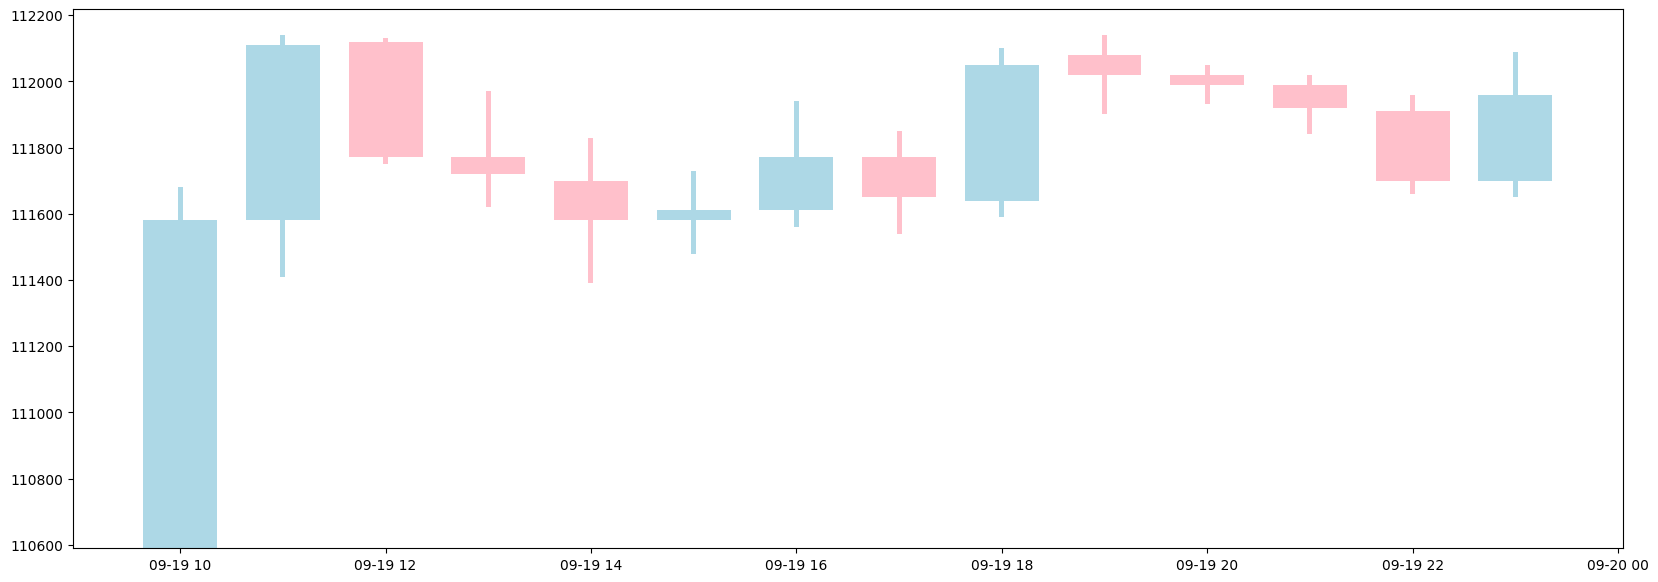

In [ ]:
fig = plt.subplots(figsize =(20, 7))
up = d2[d2['close'] >= d2['open']]
down = d2[d2['close'] < d2['open']]
col1 = 'lightblue'
col2 = 'pink'
width = .03
width2 = .002
plt.bar(up.index, up.close-up.open, width, bottom=up.open, color=col1)
plt.bar(up.index, up.high-up.close, width2, bottom=up.close, color=col1)
plt.bar(up.index, up.low-up.open, width2, bottom=up.open, color=col1)
plt.bar(down.index, down.close-down.open, width, bottom=down.open, color=col2)
plt.bar(down.index, down.high-down.open, width2, bottom=down.open, color=col2)
plt.bar(down.index, down.low-down.close, width2, bottom=down.close, color=col2)
plt.show()